### Classifier using three timesteps 
#### rows 0-2, ~27.4 years

In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

In [46]:
planets = pd.read_csv('5ts.csv', skipinitialspace=True)
print(planets.columns)

Index(['run', 'planet', 'initial e', 'final e', 'mean e', 'min e', 'max e',
       'sd e', 'initial pericenter', 'final pericenter', 'mean pericenter',
       'min pericenter', 'max pericenter', 'sd pericenter', 'initial jacobi',
       'final jacobi', 'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi',
       'initial mhr1', 'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1',
       'sd mhr1', 'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2',
       'max mhr2', 'sd mhr2', 'initial a1_ratio', 'final a1_ratio',
       'mean a1_ratio', 'min a1_ratio', 'max a1_ratio', 'sd a1_ratio',
       'initial a2_ratio', 'final a2_ratio', 'mean a2_ratio', 'min a2_ratio',
       'max a2_ratio', 'sd a2_ratio', 'initial mass1_ratio',
       'final mass1_ratio', 'mean mass1_ratio', 'min mass1_ratio',
       'max mass1_ratio', 'sd mass1_ratio', 'initial mass2_ratio',
       'final mass2_ratio', 'mean mass2_ratio', 'min mass2_ratio',
       'max mass2_ratio', 'sd mass2_ratio', 'end time', 'fate'],


###### Classifies as type of instability (ejection, remaining, planet-planet collision, central body collision).

In [ ]:
fates = list(set(planets['fate']))
types = {fates[i] : i for i in range(len(fates))}
int_dict = {i : fates[i] for i in range(len(fates))}
classes = planets['fate'].map(types)

###### Classifies as either stable or unstable.
Second cell is the hard coded version

In [ ]:
fates = np.sort(list(set(planets['fate']))) [::-1]

types = {fates[i] : i for i in range(len(fates))}

classes = planets['fate'].map(types)

for i in range(len(classes)):
    if classes[i] == 0:
        pass
    else:
        classes[i] = 1

In [4]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

###### Training

In [63]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

d = ['run', 'planet', 'fate', 'end time']

var = ['e','pericenter','jacobi','mhr1','mhr2','a1_ratio','a2_ratio','mass1_ratio','mass2_ratio'] 

for v in var:
#     d.append('initial ' + str(v))
#     d.append('final ' + str(v))
    d.append('mean ' + str(v))
    d.append('min ' + str(v))
    d.append('max ' + str(v))
#     d.append('sd ' + str(v))

ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
classifier = GradientBoostingClassifier(random_state=7)
classifier.fit(features_train, classes_train)

GradientBoostingClassifier(random_state=7)

In [65]:
classes_predict = classifier.predict( features_test )
print('Classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

Classifier is  86.0 % accurate on testing set


###### Feature importances

In [56]:
feats=classifier.feature_importances_
inds=np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

sd e 0.2045344139359075
initial a2_ratio 0.17818028388863114
final mass2_ratio 0.10822082400871495
initial mass2_ratio 0.05846399201459912
final mass1_ratio 0.05779707271388694
initial jacobi 0.0449639116944594
sd pericenter 0.04435909647772668
initial mass1_ratio 0.041194705487969434
initial a1_ratio 0.03994611203409224
initial mhr1 0.036726496776985154
initial mhr2 0.026357351946244948
final e 0.024322059987701577
sd jacobi 0.02081312955401735
final a2_ratio 0.0150251548951341
final pericenter 0.01426449499423379
sd a1_ratio 0.014178159657743723
final mhr2 0.01224722613442466
initial e 0.011702778439172834
sd a2_ratio 0.010008666378850187
sd mhr1 0.009275274862612783
final a1_ratio 0.007525598820013255
final mhr1 0.005768157468052628
final jacobi 0.004773453458558499
initial pericenter 0.00444477653817849
sd mass1_ratio 0.0028710091914456812
sd mhr2 0.0020357986406429316
sd mass2_ratio 0.0


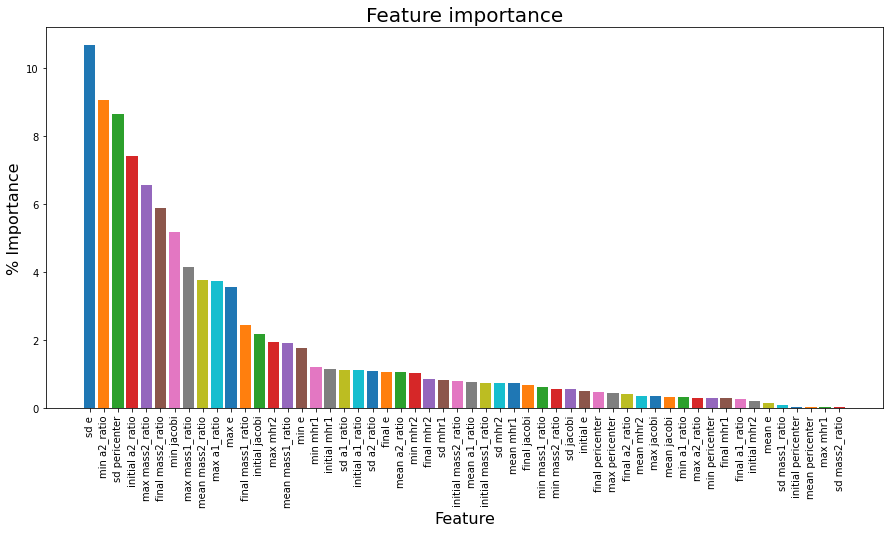

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pylab


f=plt.figure(figsize=(15,7))

for i in range(len(inds)):
    plt.bar(cols[inds[i]], feats[inds[i]] * 100)
    

 
plt.ylabel('% Importance', size=16)
plt.xlabel('Feature', size=16)
plt.title('Feature importance', size=20)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Eccentricity standard deviation')

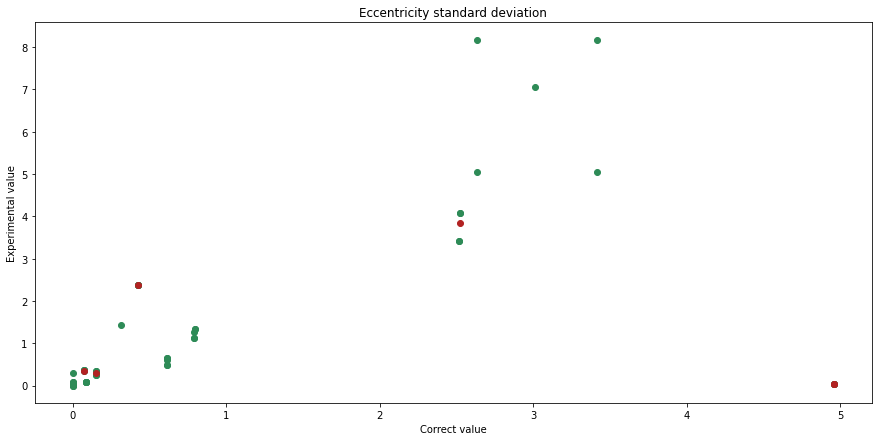

In [21]:
f=plt.figure(figsize=(15,7))


for i in range(0,54):
    if (classes_test[i] == classes_predict[i]):
        plt.scatter(features_test[5][i], features_train[5][i], color = 'seagreen')
    else:
        plt.scatter(features_test[5][i], features_train[5][i], color = 'firebrick', zorder = 2)
        
plt.ylabel('Experimental value')
plt.xlabel('Correct value')
plt.title('Eccentricity standard deviation')

Text(0.5, 1.0, 'Minimum semi-major axis 2')

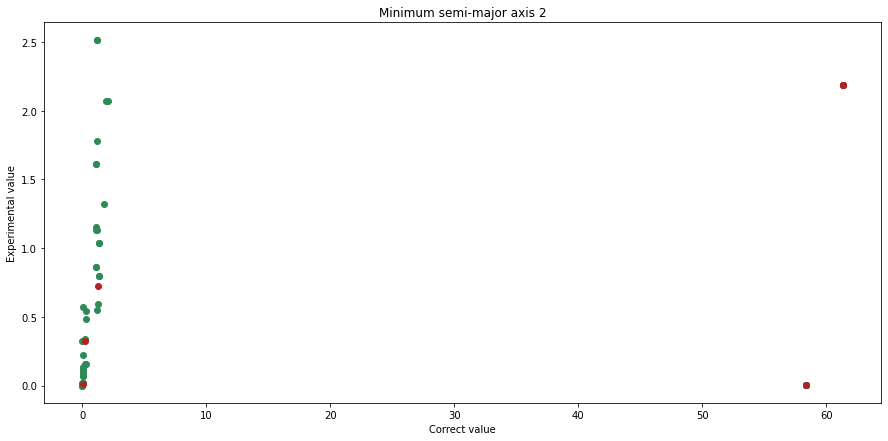

In [20]:
f=plt.figure(figsize=(15,7))


for i in range(0,54):
    if (classes_test[i] == classes_predict[i]):
        plt.scatter(features_test[39][i], features_train[39][i], color = 'seagreen')
    else:
        plt.scatter(features_test[39][i], features_train[39][i], color = 'firebrick', zorder = 2)
        
plt.ylabel('Experimental value')
plt.xlabel('Correct value')
plt.title('Minimum semi-major axis 2')

Text(0.5, 1.0, 'Pericenter standard deviation')

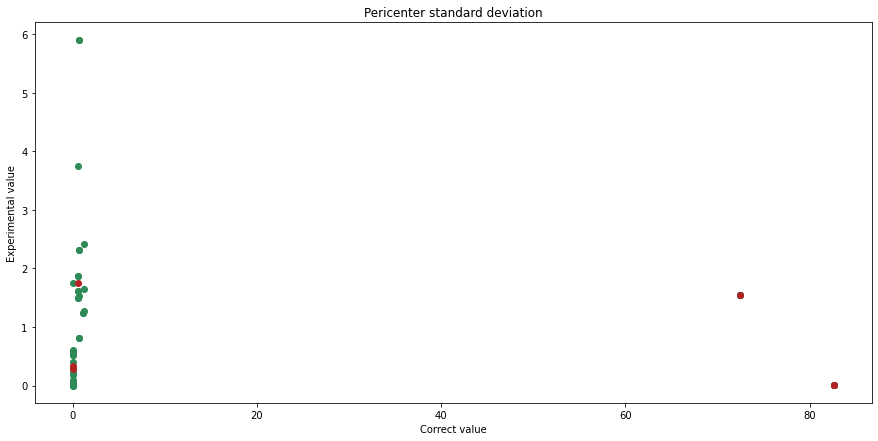

In [22]:
f=plt.figure(figsize=(15,7))


for i in range(0,54):
    if (classes_test[i] == classes_predict[i]):
        plt.scatter(features_test[11][i], features_train[11][i], color = 'seagreen')
    else:
        plt.scatter(features_test[11][i], features_train[11][i], color = 'firebrick', zorder = 2)
        
plt.ylabel('Experimental value')
plt.xlabel('Correct value')
plt.title('Pericenter standard deviation')